In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(32,20)

In [86]:
pred=pd.read_csv("C:\\Users\\User\\Desktop\\predictionn.csv")
pred.head(5)  #displays first five rows

,location,total_sqft,distance,shapeofplot,neighboringarea,price
0,Derebail,1056,20,Triangle,Dmart,39.07
1,Kavoor,2600,10,Rectangle,Near Temple,120.00
2,Lalbagh,1440,50,Circular,Bus Stand,62.00
3,Kodialbail,1521,20,Triangle,Bus Stand,95.00
4,Pavoor,1200,25,Triangle,Expert College1,51.00


In [87]:
pred.shape #displays total rows and columns

(500, 6)

In [88]:
pred.dtypes  #checking the datatypes of dataset

location            object
total_sqft          object
distance             int64
shapeofplot         object
neighboringarea     object
price              float64
dtype: object

In [89]:
pred.groupby('location')['location'].agg('count') #counting the total number of per locations present in dataset

location
APMC           5
Adarshnagar    2
Adyar          8
Aikala         5
Ajekar         1
              ..
Yekkuru        1
Yellare        1
Yellur         1
Yemmekere      1
Yeyyadi        7
Name: location, Length: 186, dtype: int64

In [90]:
pred1=pred.dropna()#Drops the null values if present in dataset
print(pred1)

       location total_sqft  distance             shapeofplot  \
0      Derebail       1056        20                Triangle   
1        Kavoor       2600        10               Rectangle   
2       Lalbagh       1440        50                Circular   
3    Kodialbail       1521        20                Triangle   
4        Pavoor       1200        25                Triangle   
..          ...        ...       ...                     ...   
494      Muchur       1100       560                Circular   
495      Nagori       1000       300                Triangle   
497      Thodar        950       450                Circular   
498      Thokur       1075       600                Circular   
499      Thokur       1075       600                Circular   

           neighboringarea   price  
0                    Dmart   39.07  
1              Near Temple  120.00  
2                Bus Stand   62.00  
3                Bus Stand   95.00  
4          Expert College1   51.00  
..       

In [91]:
pred1.shape #The size of dataset after removing the null values present in dataset

(495, 6)

In [92]:
pred1.tail(4)#To check whether the null values is removed or not(Here row no.496 is removed)

,location,total_sqft,distance,shapeofplot,neighboringarea,price
495,Nagori,1000,300,Triangle,Dmart2,53.0
497,Thodar,950,450,Circular,Easyday2,32.0
498,Thokur,1075,600,Circular,XYZ Park,36.0
499,Thokur,1075,600,Circular,XYZ Park,36.0


In [93]:
res=pred1.duplicated()#If duplicate values is present in dataset then it returns true else false
res.tail(2)

498    False
499     True
dtype: bool

In [94]:
pred2=pred1.drop_duplicates()#Removes the duplicate values present in the dataset
pred2.tail(5)

,location,total_sqft,distance,shapeofplot,neighboringarea,price
493,Kote,1150,450,Rectangle,Vikas College,52.5
494,Muchur,1100,560,Circular,Brigade Apartment,63.0
495,Nagori,1000,300,Triangle,Dmart2,53.0
497,Thodar,950,450,Circular,Easyday2,32.0
498,Thokur,1075,600,Circular,XYZ Park,36.0


In [95]:
pred2.shape#Shows the number of rows and columns after removing the null values and duplicates 

(494, 6)

In [96]:
pred2.total_sqft.unique()

array(['1056', '2600', '1440', '1521', '1200', '1000', '2732', '3300',
       '1310', '1020', '1800', '1100', '2250', '1175', '660', '1540',
       '2770', '600', '1755', '2800', '1767', '510', '1250', '1610',
       '1151', '1025', '2100', '1075', '1760', '1693', '1925', '700',
       '1070', '1724', '1290', '1143', '1296', '1254', '1330', '970',
       '1459', '800', '869', '1270', '1670', '2010', '1185', '1600',
       '3010', '1500', '1407', '840', '4395', '845', '5700', '1160',
       '3000', '1140', '1220', '1350', '1005', '500', '1358', '1569',
       '1240', '2089', '1206', '1150', '2511', '460', '4400', '1660',
       '2957', '1326', '1325', '1499', '1665', '708', '1060', '710',
       '1450', '2894', '2502', '650', '2400', '1007', '966', '1630',
       '1640', '782', '1260', '1413', '1116', '1530', '3700', '2497',
       '1436', '276', '1427', '2061', '3067', '2650', '1282', '1050',
       '945', '950', '1870', '880', '1535', '1360', '1042', '1280',
       '5000', '3050', '11

In [97]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [98]:
pred2[~pred2['total_sqft'].apply(is_float)]

,location,total_sqft,distance,shapeofplot,neighboringarea,price
339,Beluvai,1200-1400,6000,Circular,Dmart1,79.0
422,Kottara,1060-1160,200,Rectangle,Dmart,26.5


In [99]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [100]:
convert_sqft_to_num('2166')

2166.0

In [101]:
convert_sqft_to_num('1200-1400')

1300.0

In [102]:
pred3=pred2.copy()#deep-copy
pred3['total_sqft']=pred3['total_sqft'].apply(convert_sqft_to_num)
pred3.head(340)

,location,total_sqft,distance,shapeofplot,neighboringarea,price
0,Derebail,1056.0,20,Triangle,Dmart,39.07
1,Kavoor,2600.0,10,Rectangle,Near Temple,120.00
2,Lalbagh,1440.0,50,Circular,Bus Stand,62.00
3,Kodialbail,1521.0,20,Triangle,Bus Stand,95.00
4,Pavoor,1200.0,25,Triangle,Expert College1,51.00
...,...,...,...,...,...,...
335,Aikala,1173.0,1000,Rectangle,Near Temple,58.00
336,Alangar,1020.0,1000,Rectangle,Bus Stand,45.00
337,Asaigoli,3122.0,2000,Rectangle,Bus Stand,230.00
338,Bajal,1600.0,2500,Triangle,Expert College1,64.00


In [103]:
pred4=pred3.copy()#deep-copy
pred4['price_per_sqft']=pred4['price']*100000/pred4['total_sqft'] #Creates another column in dataset.i.e,price_per_sqft
pred4.head(4)

,location,total_sqft,distance,shapeofplot,neighboringarea,price,price_per_sqft
0,Derebail,1056.0,20,Triangle,Dmart,39.07,3699.810606
1,Kavoor,2600.0,10,Rectangle,Near Temple,120.00,4615.384615
2,Lalbagh,1440.0,50,Circular,Bus Stand,62.00,4305.555556
3,Kodialbail,1521.0,20,Triangle,Bus Stand,95.00,6245.890861


In [104]:
len(pred4.location.unique())#Shows the length of location that contains unique names

186

In [105]:
len(pred4.neighboringarea.unique())

43

In [106]:
pred4.location=pred4.location.apply(lambda x:x.strip())#Removes if any spaces are present in location column
location_stats=pred4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Bantwal        11
Bajpe          10
Attavar         8
Adyar           8
Kodikal         8
               ..
Kodialguthu     1
Kinnigoli       1
Kedinje         1
Katipalla       1
Lohithnagar     1
Name: location, Length: 186, dtype: int64

In [107]:
location_stats1=location_stats[location_stats<=4]#Displays the number of locations that is repeated less than or equal to 5
location_stats1

location
Falnir         4
Bajal          4
Balkudru       4
Manipal        4
Mallar         4
              ..
Kodialguthu    1
Kinnigoli      1
Kedinje        1
Katipalla      1
Lohithnagar    1
Name: location, Length: 153, dtype: int64

In [108]:
pred4.location=pred4.location.apply(lambda x:'other'if x in location_stats1 else x)#Displays other in the place where the number of locations is less than or equal to 5
len(pred4.location.unique())

34

In [109]:
pred4.head(10)

,location,total_sqft,distance,shapeofplot,neighboringarea,price,price_per_sqft
0,Derebail,1056.0,20,Triangle,Dmart,39.07,3699.810606
1,other,2600.0,10,Rectangle,Near Temple,120.00,4615.384615
2,other,1440.0,50,Circular,Bus Stand,62.00,4305.555556
3,other,1521.0,20,Triangle,Bus Stand,95.00,6245.890861
4,other,1200.0,25,Triangle,Expert College1,51.00,4250.000000
5,Bajpe,1000.0,20,Circular,Dmart1,38.00,3800.000000
6,Ullala,2732.0,10,Circular,Habitat Apartment,204.00,7467.057101
7,Derebail,3300.0,20,Rectangle,Land Trades Apartment,600.00,18181.818182
8,Boloor,1310.0,25,Circular,Canara School,63.25,4828.244275
9,Ammunje,1020.0,35,Triangle,Vikas College,370.00,36274.509804


In [110]:
pred4.shape

(494, 7)

In [32]:
pred4.price_per_sqft.describe()

count       494.000000
mean       7982.223666
std       30263.399425
min        1875.000000
25%        4301.388889
50%        5438.708760
75%        6993.381811
max      672727.272727
Name: price_per_sqft, dtype: float64

In [111]:
#Since the max. price_per_sqft is very high so we need to reduce it to get the better performance so we make use of this function.This function is used to remove the values that is greater or lesser than standard deviation and mean 

def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
            m=np.mean(subdf.price_per_sqft)
            st=np.std(subdf.price_per_sqft)
            red1=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
            df_out=pd.concat([df_out,red1],ignore_index=True)
    return df_out
pred5=remove_outliers(pred4)
pred5.shape

(439, 7)

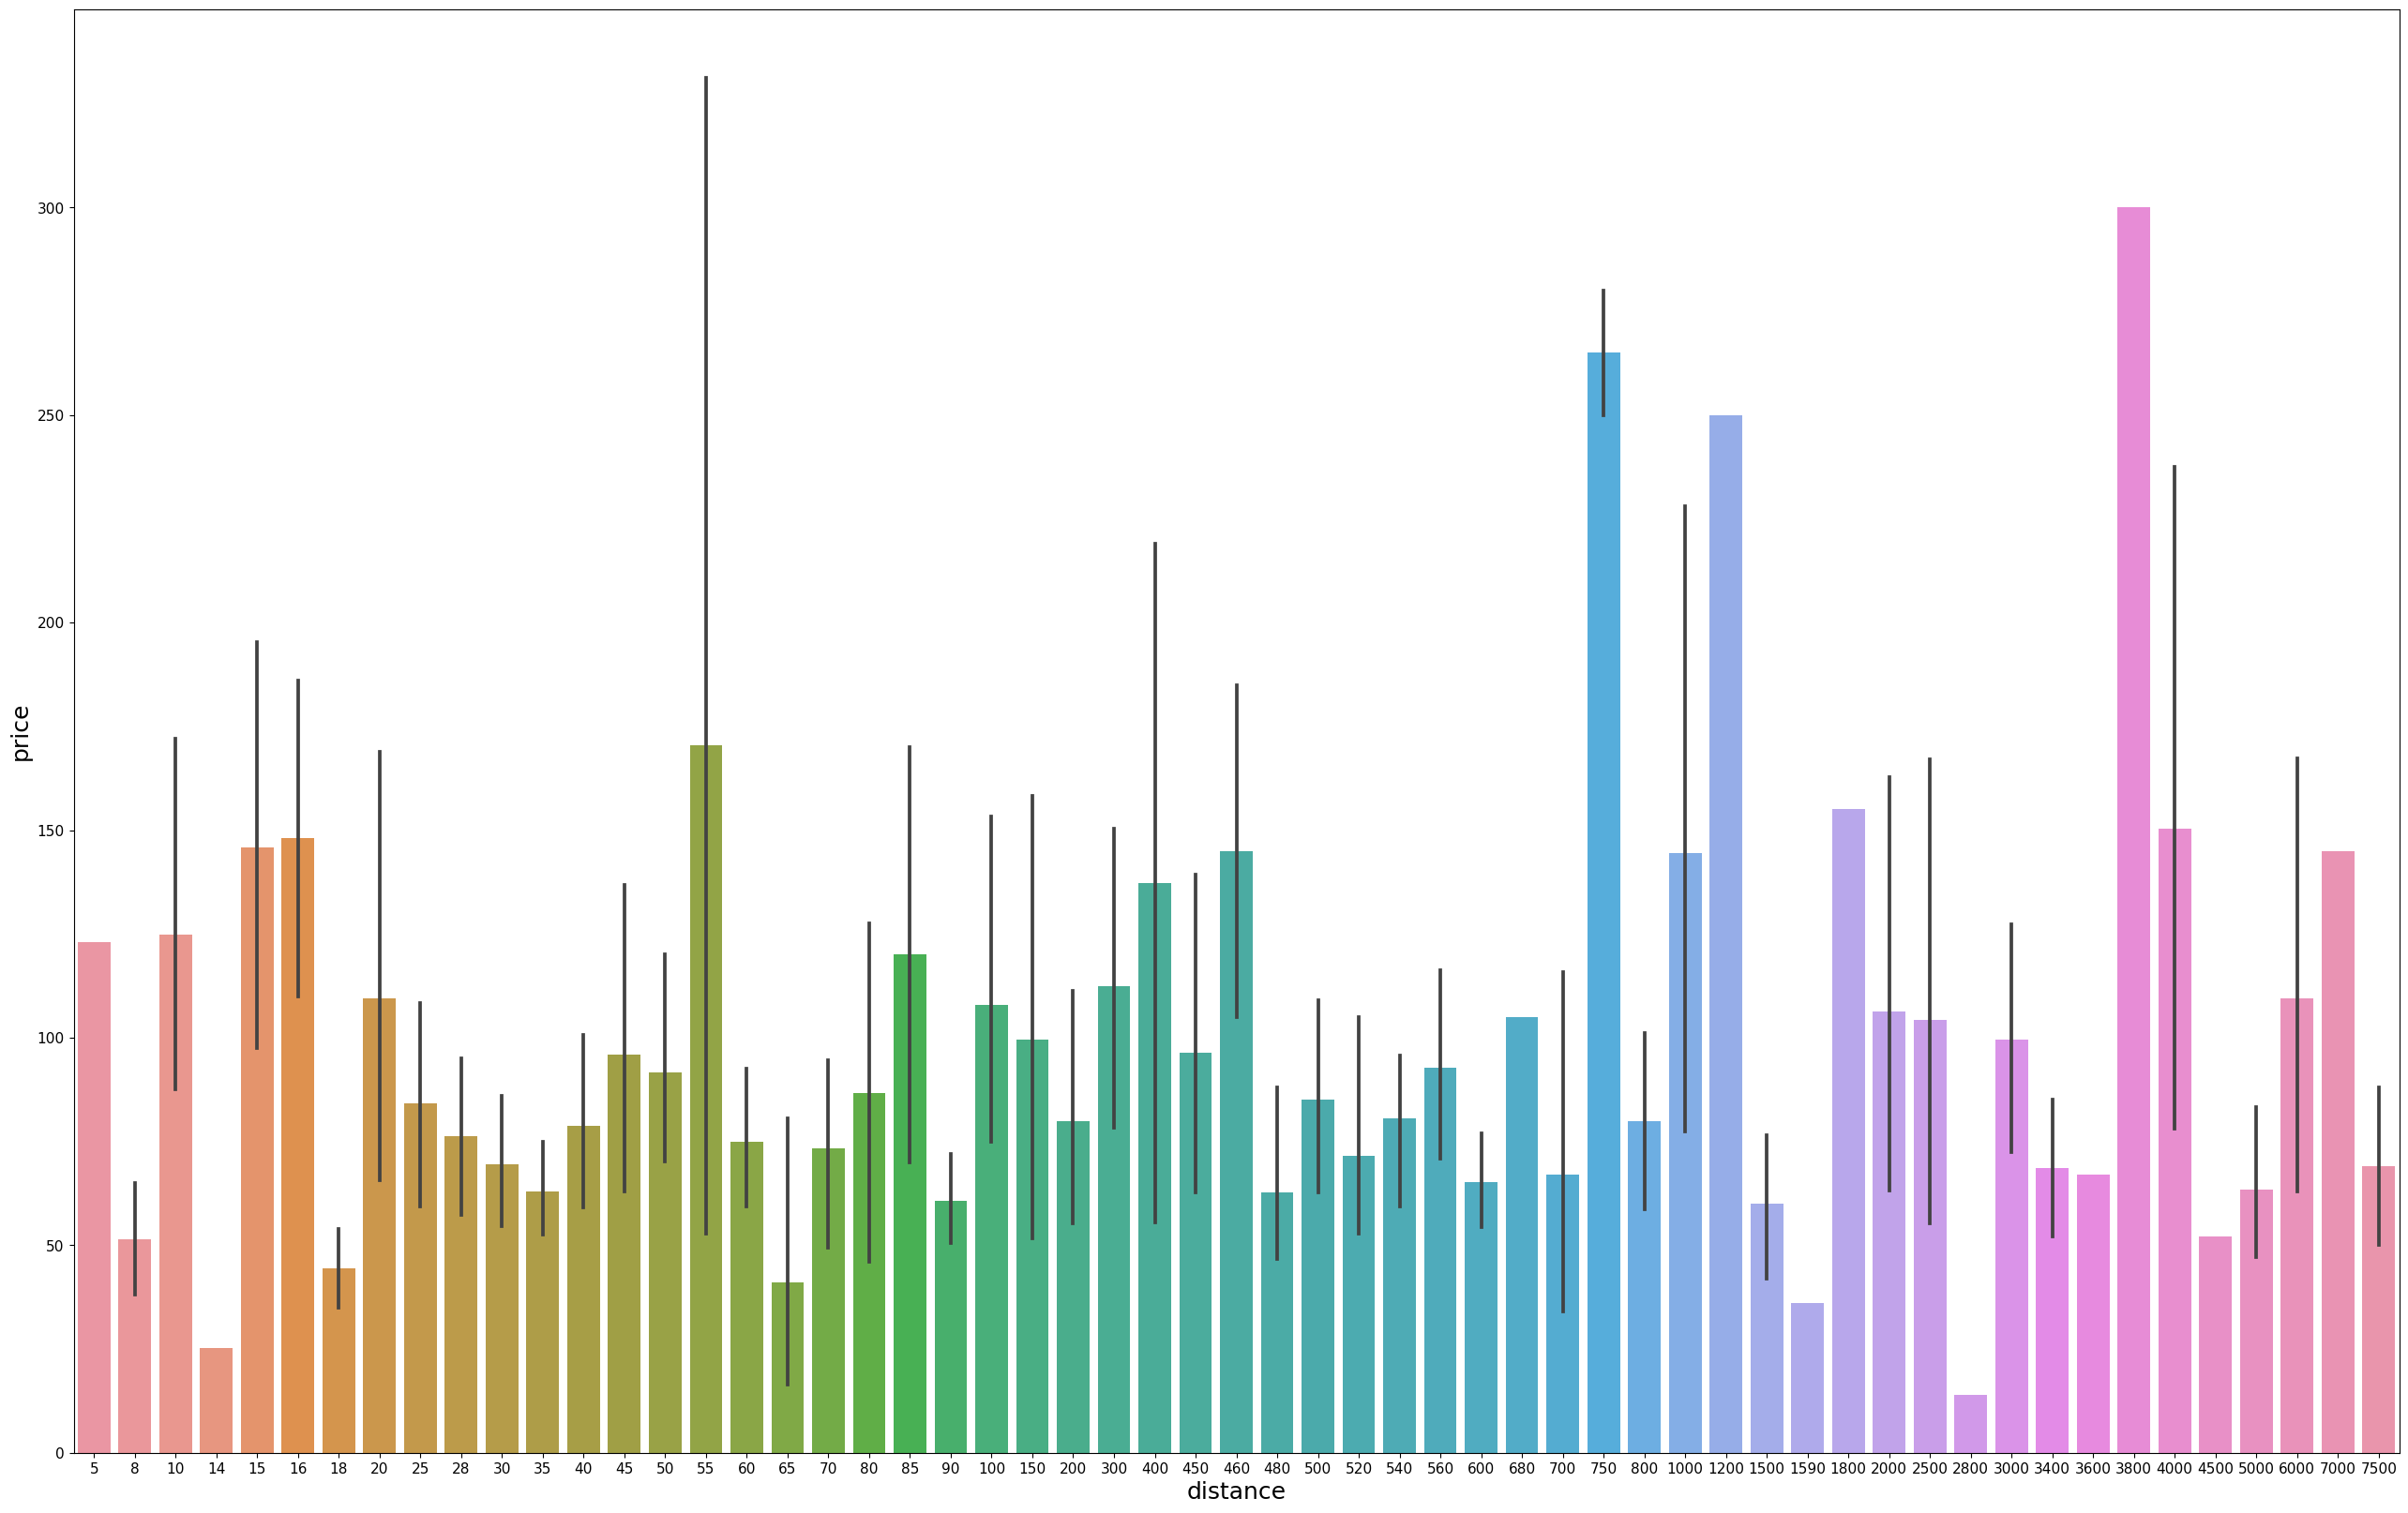

In [135]:
import seaborn as sns
sns.barplot(x="distance",y="price",data=pred5)
plt.xlabel('distance',fontsize=18)
plt.ylabel('price',fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()#Displays the barplot

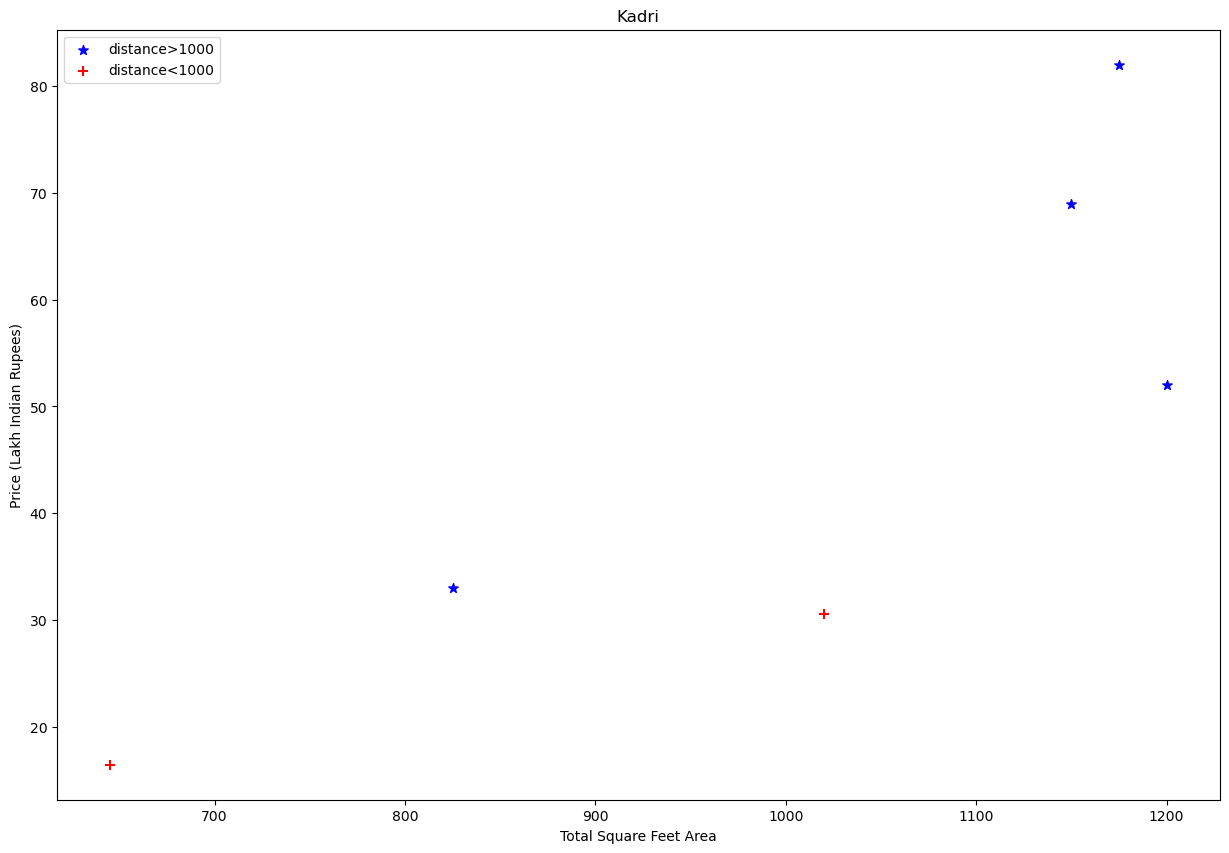

In [136]:
def plot_scatter_chart(df,location):
    distance1= df[(df.location==location) & (df.distance>1000)]
    distance2= df[(df.location==location) & (df.distance<1000)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(distance1.total_sqft,distance1.price,marker='*',color='blue',label='distance>1000', s=50)
    plt.scatter(distance2.total_sqft,distance2.price,marker='+', color='red',label='distance<1000', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(pred5,"Kadri")#Displays the scatter chart for location named "Kadri" w.r.t its total_sqft and price of residential plot

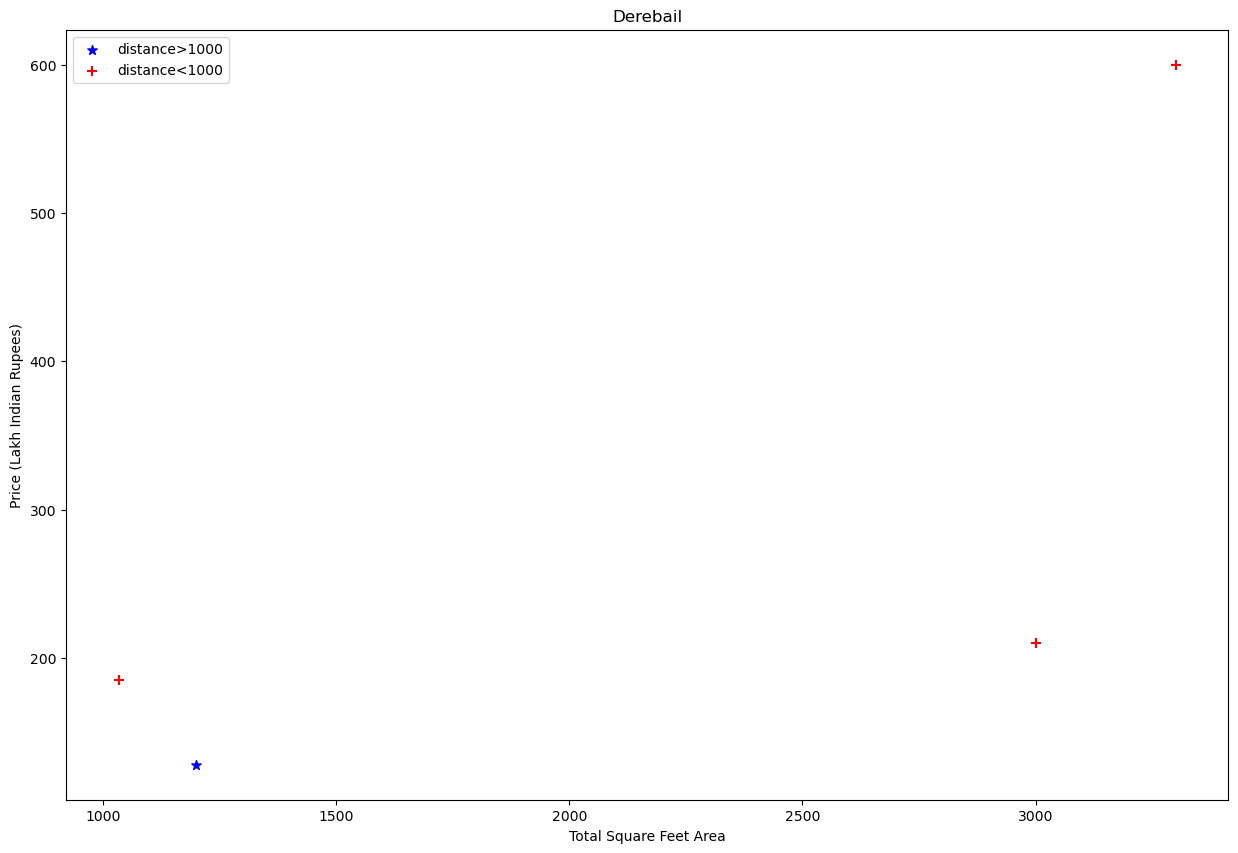

In [137]:
def plot_scatter_chart(df,location):
    distance1= df[(df.location==location) & (df.distance>1000)]
    distance2= df[(df.location==location) & (df.distance<1000)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(distance1.total_sqft,distance1.price,marker='*',color='blue',label='distance>1000', s=50)
    plt.scatter(distance2.total_sqft,distance2.price,marker='+', color='red',label='distance<1000', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(pred5,"Derebail")#Displays the scatter chart for location named "Derebail" w.r.t its total_sqft and price of residential plot

In [138]:
pred6=pred5.drop(['shapeofplot','neighboringarea'],axis='columns')#Drops the location column because we have performed one-hot encoding which would give better accuracy and other columns are removed which is not required
pred6.head(5)

,location,total_sqft,distance,price,price_per_sqft
0,APMC,1000.0,85,70.0,7000.000000
1,APMC,2000.0,85,120.0,6000.000000
2,APMC,1440.0,28,95.0,6597.222222
3,Adyar,1000.0,50,38.0,3800.000000
4,Adyar,1600.0,90,65.0,4062.500000


In [139]:
pred6.to_csv("C:\\Users\\User\\Desktop\\Cleaneddata2.csv")

In [140]:
X= pred6.drop(['price'],axis='columns')
X.head(5)

,location,total_sqft,distance,price_per_sqft
0,APMC,1000.0,85,7000.000000
1,APMC,2000.0,85,6000.000000
2,APMC,1440.0,28,6597.222222
3,Adyar,1000.0,50,3800.000000
4,Adyar,1600.0,90,4062.500000


In [141]:
y = pred5.price
y.head(6)

0     70.0
1    120.0
2     95.0
3     38.0
4     65.0
5    250.0
Name: price, dtype: float64

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [143]:
print(X_train.shape)
print(X_test.shape)

(351, 4)
(88, 4)


In [144]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score




column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')
scaler=StandardScaler()
lr=LinearRegression()
pipe=make_pipeline(column_trans,scaler,lr)
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)



C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8897601828336743

Text(0, 0.5, 'Predicted prices')

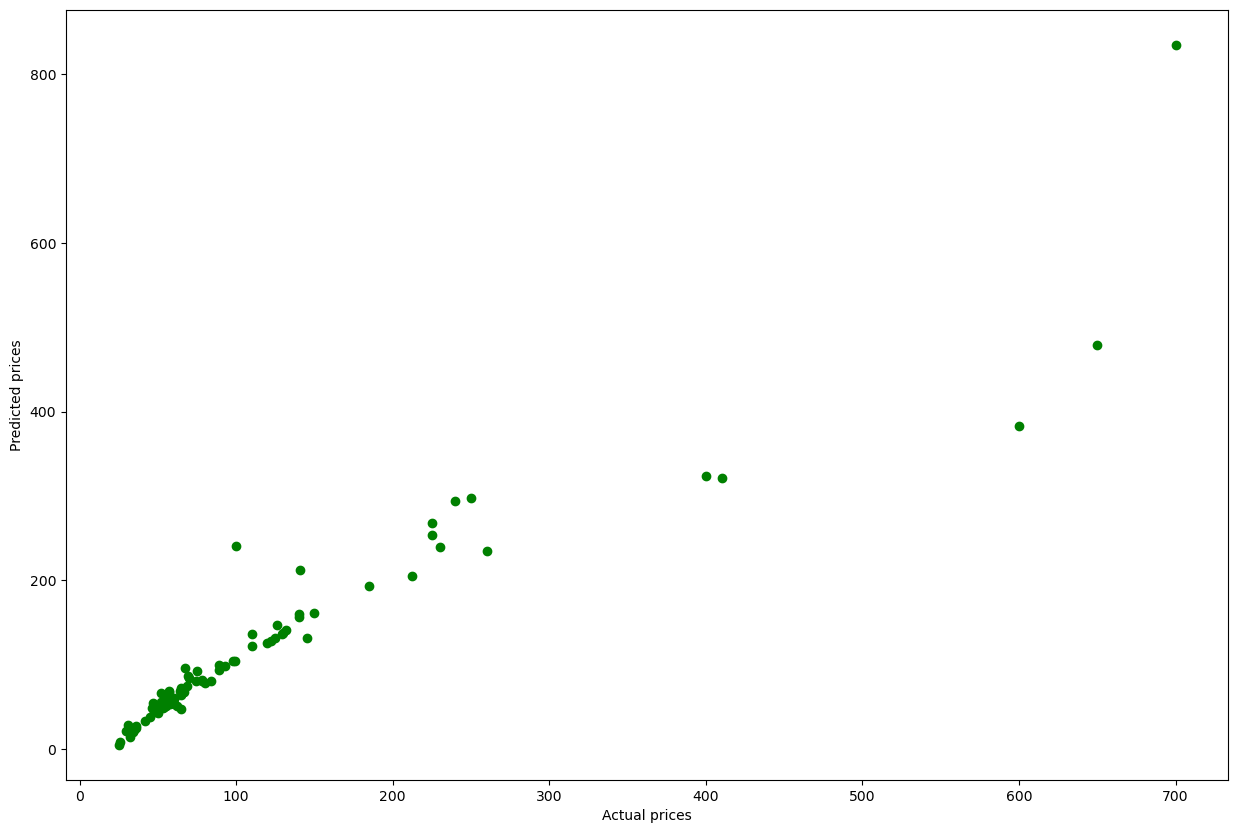

In [145]:
#predictions=pipe.predict(X_test)

plt.scatter(y_test,y_pred_lr,color='g')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')

In [146]:
ridge=Ridge()
pipe=make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8898541855958338

In [147]:
import pickle
pickle.dump(pipe,open('C:\\Users\\User\\Desktop\\prediction1.pkl','wb'))